In [2]:
import pandas as pd

df = pd.read_excel("donnees_projet_emargement.xlsx")
df.head()


,id_etudiant,nom_etudiant,filiere,niveau,date,heure,cours,salle,present,retard,justificatif,note_cc,note_exam,distance_domicile,connecte_wifi,nb_notifications
0,46,Lucie,Informatique,L1,2025-04-01,10:00,Big Data,A1,1.0,0.0,0.0,12.0,8.0,9.8,1,4
1,3,Ali,Anglais Pro,L1,2025-04-02,08:00,Python,C3,1.0,0.0,1.0,12.0,12.0,10.3,1,3
2,29,Awa,Informatique,L1,2025-04-03,10:00,Maths,A1,1.0,1.0,0.0,14.0,14.0,12.2,1,3
3,35,Sara,Marketing,L1,2025-04-04,15:00,Anglais,D4,1.0,0.0,0.0,16.0,14.0,2.4,1,3
4,39,Sara,Informatique,L1,2025-04-05,17:00,Compta,C3,1.0,0.0,0.0,10.0,14.0,7.8,1,5


In [3]:
df.isnull().sum()


id_etudiant           0
nom_etudiant          0
filiere               0
niveau                0
date                  0
heure                 0
cours                 0
salle                 0
present              14
retard               21
justificatif         10
note_cc              30
note_exam            33
distance_domicile     0
connecte_wifi         0
nb_notifications      0
dtype: int64

In [5]:
# Étape 1 : Supprimer les lignes avec valeur manquante dans 'present'
df = df.dropna(subset=['present'])

# Étape 2 : Remplacer les NaN dans retard, justificatif, note_cc, note_exam
df = df.fillna({
    'retard': 0,
    'justificatif': 0,
    'note_cc': df['note_cc'].mean(),
    'note_exam': df['note_exam'].mean()
})


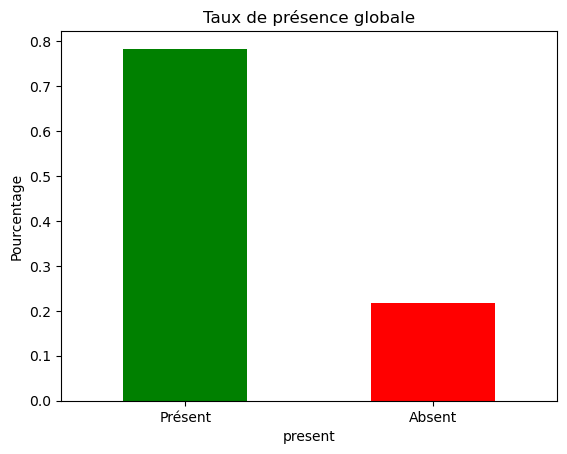

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pourcentage de présence et d'absence
df['present'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title("Taux de présence globale")
plt.xticks([0, 1], ['Présent', 'Absent'], rotation=0)
plt.ylabel("Pourcentage")
plt.show()


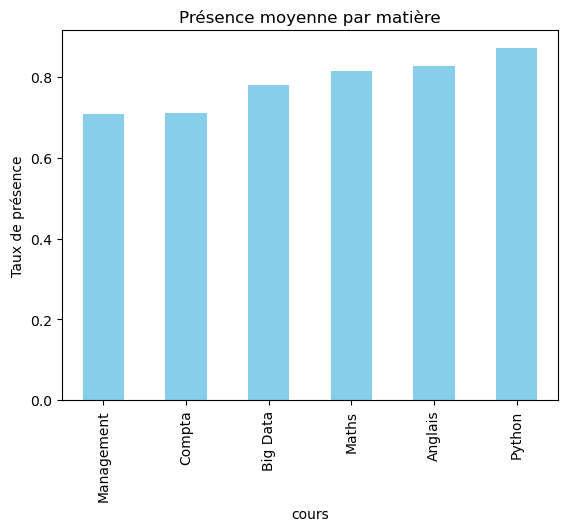

In [7]:
# Moyenne de présence par cours
df.groupby('cours')['present'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title("Présence moyenne par matière")
plt.ylabel("Taux de présence")
plt.show()


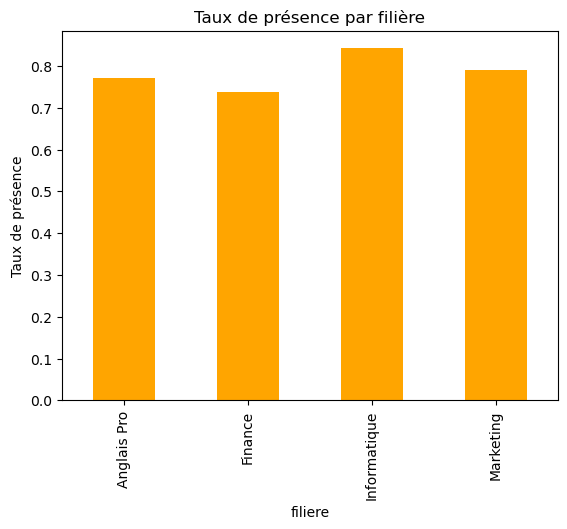

In [8]:
df.groupby('filiere')['present'].mean().plot(kind='bar', color='orange')
plt.title("Taux de présence par filière")
plt.ylabel("Taux de présence")
plt.show()


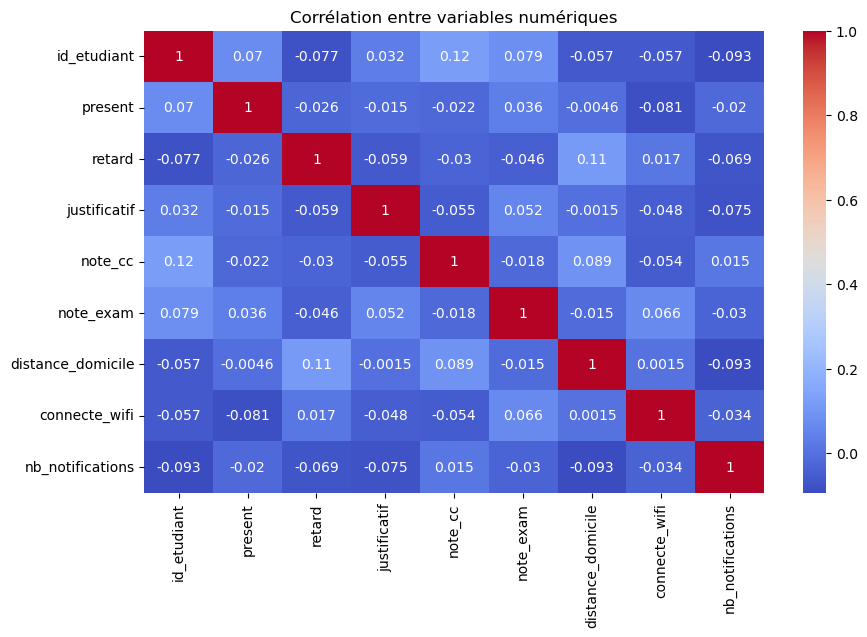

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Sélectionner les colonnes numériques uniquement
df_num = df.select_dtypes(include='number')

# Étape 2 : Créer la heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Variables explicatives (X)
X = df[['retard', 'justificatif', 'distance_domicile', 'connecte_wifi', 'nb_notifications']]

# Variable à prédire (y)
y = df['present']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

print("🎯 Précision :", accuracy_score(y_test, y_pred))
print("\n📊 Rapport de classification :\n", classification_report(y_test, y_pred))
print("🧩 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


🎯 Précision : 0.7674418604651163

📊 Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.77      1.00      0.87        66

    accuracy                           0.77        86
   macro avg       0.38      0.50      0.43        86
weighted avg       0.59      0.77      0.67        86

🧩 Matrice de confusion :
 [[ 0 20]
 [ 0 66]]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.77      1.00      0.87        66

    accuracy                           0.77        86
   macro avg       0.38      0.50      0.43        86
weighted avg       0.59      0.77      0.67        86



In [17]:
y.value_counts(normalize=True)


present
1.0    0.783217
0.0    0.216783
Name: proportion, dtype: float64

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Précision arbre de décision :", accuracy_score(y_test, y_pred_tree))


Précision arbre de décision : 0.5348837209302325


In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)


In [22]:
# Créer la colonne 'moyenne' si tu ne l’as pas encore faite
df['moyenne'] = (df['note_cc'] + df['note_exam']) / 2

# Créer la colonne 'reussite' : 1 si moyenne >= 10, sinon 0
df['reussite'] = df['moyenne'].apply(lambda x: 1 if x >= 10 else 0)


In [23]:
y = df['reussite']


In [25]:
# Sauvegarder le modèle entraîné dans un fichier
joblib.dump(model, 'modele_presence.pkl')


['modele_presence.pkl']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Définir les variables X et y
X = df[['retard', 'justificatif', 'distance_domicile', 'connecte_wifi', 'nb_notifications']]
y = df['present']

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [29]:
# Sauvegarder le modèle entraîné dans un fichier
joblib.dump(model, 'modele_presence.pkl')


['modele_presence.pkl']

In [7]:
import pandas as pd

df = pd.read_excel("donnees_projet_emargement.xlsx")


In [9]:
df['retard'] = df['retard'].fillna(0)
df['justificatif'] = df['justificatif'].fillna(0)
df['distance_domicile'] = df['distance_domicile'].fillna(df['distance_domicile'].mean())
df['connecte_wifi'] = df['connecte_wifi'].fillna(0)
df['nb_notifications'] = df['nb_notifications'].fillna(0)


In [11]:
df['present'] = df['present'].fillna(0)


In [12]:
# Nettoyage complet
df['retard'] = df['retard'].fillna(0)
df['justificatif'] = df['justificatif'].fillna(0)
df['distance_domicile'] = df['distance_domicile'].fillna(df['distance_domicile'].mean())
df['connecte_wifi'] = df['connecte_wifi'].fillna(0)
df['nb_notifications'] = df['nb_notifications'].fillna(0)
df['present'] = df['present'].fillna(0)  # ✅ AJOUTÉ ICI


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

X = df[['retard', 'justificatif', 'distance_domicile', 'connecte_wifi', 'nb_notifications']]
y = df['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

joblib.dump(model, "modele_presence.pkl")


['modele_presence.pkl']